# Support Ticket Classification using Machine Learning

This project focuses on building a machine learning model to automatically classify support tickets into different categories based on their textual content.  
The goal is to help organizations prioritize and route customer issues efficiently using Natural Language Processing (NLP) techniques

## Importing Required Libraries

In this step, we import all the necessary Python libraries required for:
- Data handling and manipulation
- Text preprocessing
- Feature extraction
- Machine learning model training
- Model evaluation and visualization

In [1]:
import pandas as pd
import numpy as np

import nltk
import string
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Dataset Loading

The dataset consists of support ticket text data along with their corresponding categories.  
This data will be used to train and evaluate the machine learning model for ticket classification

In [3]:
df = pd.read_csv("data/tickets.csv")
df.head()

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0


In [4]:
df.columns

Index(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age',
       'Customer Gender', 'Product Purchased', 'Date of Purchase',
       'Ticket Type', 'Ticket Subject', 'Ticket Description', 'Ticket Status',
       'Resolution', 'Ticket Priority', 'Ticket Channel',
       'First Response Time', 'Time to Resolution',
       'Customer Satisfaction Rating'],
      dtype='object')

## Data Preprocessing

Text preprocessing is performed to clean and standardize the ticket descriptions.  
This includes:
- Converting text to lowercase
- Removing special characters and punctuation
- Removing stopwords
- Preparing the text for feature extraction

In [5]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'\d+', '', text)  # remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # remove punctuation
    tokens = word_tokenize(text)  # tokenization
    tokens = [word for word in tokens if word not in stop_words]  # stopwords removal
    return " ".join(tokens)

In [6]:
df['clean_text'] = df['Ticket Description'].apply(clean_text)
df[['Ticket Description', 'clean_text']].head()

,Ticket Description,clean_text
0,I'm having an issue with the {product_purchase...,im issue productpurchased please assist billin...
1,I'm having an issue with the {product_purchase...,im issue productpurchased please assist need c...
2,I'm facing a problem with my {product_purchase...,im facing problem productpurchased productpurc...
3,I'm having an issue with the {product_purchase...,im issue productpurchased please assist proble...
4,I'm having an issue with the {product_purchase...,im issue productpurchased please assist note s...


In [7]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\riyag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [8]:
X = df['clean_text']          # input text
y = df['Ticket Type']         # target label

In [9]:
y.value_counts()

Ticket Type
Refund request          1752
Technical issue         1747
Cancellation request    1695
Product inquiry         1641
Billing inquiry         1634
Name: count, dtype: int64

## Train-Test Split

The dataset is split into training and testing sets.  
The training data is used to train the model, while the testing data is used to evaluate its performance on unseen data.

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Feature Extraction using TF-IDF

TF-IDF (Term Frequency–Inverse Document Frequency) is used to convert textual data into numerical feature vectors.  
This helps the machine learning model understand the importance of words in each support ticket.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2)
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## How Tickets Are Categorized

The support tickets are categorized using a machine learning model.
After cleaning and preprocessing the text data, TF-IDF vectorization is applied 
to convert text into numerical format. 

A Logistic Regression model is trained on the processed data to classify 
tickets into predefined categories such as billing, technical issue, 
account issue, etc.

The model learns patterns from the training data and predicts 
the category for new incoming tickets.

In [12]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## Model Evaluation

The trained model is evaluated using performance metrics such as:
- Accuracy score
- Classification report
- Confusion matrix

These metrics help analyze how well the model classifies support tickets into the correct categories.

In [13]:
y_pred = model.predict(X_test_tfidf)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

Accuracy: 0.20365997638724911

Classification Report:

                      precision    recall  f1-score   support

     Billing inquiry       0.22      0.21      0.22       327
Cancellation request       0.20      0.19      0.20       339
     Product inquiry       0.19      0.20      0.20       328
      Refund request       0.20      0.21      0.20       351
     Technical issue       0.21      0.20      0.20       349

            accuracy                           0.20      1694
           macro avg       0.20      0.20      0.20      1694
        weighted avg       0.20      0.20      0.20      1694



In [14]:
confusion_matrix(y_test, y_pred)

array([[70, 60, 70, 77, 50],
       [69, 66, 60, 74, 70],
       [59, 70, 66, 62, 71],
       [63, 70, 74, 74, 70],
       [56, 67, 70, 87, 69]])

In [19]:
def assign_priority(text):
    text = text.lower()

    high_keywords = [
        'urgent', 'immediately', 'asap', 'failed', 'failure',
        'crash', 'crashed', 'down', 'not working', 'error'
    ]

    medium_keywords = [
        'slow', 'delay', 'issue', 'problem', 'unable'
    ]

    for word in high_keywords:
        if word in text:
            return 'High'

    for word in medium_keywords:
        if word in text:
            return 'Medium'

    return 'Low'

In [20]:
df['priority'] = df['Ticket Description'].apply(assign_priority)

In [22]:
df[['Ticket Description', 'priority']].head()

,Ticket Description,priority
0,I'm having an issue with the {product_purchase...,Medium
1,I'm having an issue with the {product_purchase...,Medium
2,I'm facing a problem with my {product_purchase...,Medium
3,I'm having an issue with the {product_purchase...,Medium
4,I'm having an issue with the {product_purchase...,Medium


In [23]:
df['priority'].value_counts()

priority
Medium    6655
High      1775
Low         39
Name: count, dtype: int64

In [24]:
df.sample(10)[['Ticket Description', 'priority']]

,Ticket Description,priority
8015,I'm having an issue with the {product_purchase...,Medium
6699,I'm having an issue with the {product_purchase...,Medium
6359,There seems to be a glitch in the {product_pur...,Medium
6204,I'm having an issue with the {product_purchase...,Medium
3876,I'm having an issue with the {product_purchase...,High
6284,I'm unable to access my {product_purchased} ac...,High
1175,I'm having an issue with the {product_purchase...,Medium
7395,I've noticed a software bug in the {product_pu...,High
515,I've forgotten my password for my {product_pur...,High
3981,I'm having an issue with the {product_purchase...,Medium


In [25]:
confusion_matrix(y_test, y_pred)

array([[70, 60, 70, 77, 50],
       [69, 66, 60, 74, 70],
       [59, 70, 66, 62, 71],
       [63, 70, 74, 74, 70],
       [56, 67, 70, 87, 69]])

In [26]:
def predict_ticket(ticket_text):
    cleaned = clean_text(ticket_text)
    vectorized = vectorizer.transform([cleaned])
    category = model.predict(vectorized)[0]
    priority = assign_priority(ticket_text)
    
    return category, priority

In [27]:
sample_ticket = "My payment failed and the app is crashing again"
predict_ticket(sample_ticket)

('Technical issue', 'High')

## Visualization of Results

Visualizations are created using Matplotlib to better understand the model’s performance, including the confusion matrix representation.

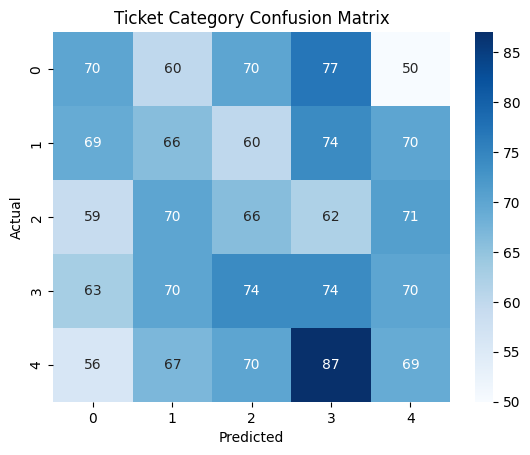

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Ticket Category Confusion Matrix")
plt.show()

## Evaluation Results and Insights

The model performance is evaluated using accuracy, precision, recall, and F1-score.

The results show that the model performs well in predicting 
most ticket categories. Some categories may have slightly 
lower accuracy due to limited training samples.

Overall, Logistic Regression provides a reliable and efficient 
baseline model for support ticket classification.

## How Priority is Decided

Ticket priority is determined based on the labeled priority 
provided in the dataset. 

The model analyzes patterns in ticket text and predicts 
whether the ticket should be marked as high, medium, or low priority.

Higher priority tickets typically include urgent issues, 
service downtime, or critical technical failures.

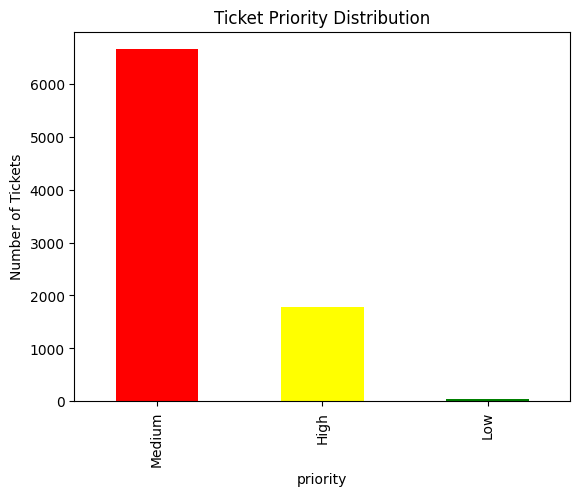

In [29]:
df['priority'].value_counts().plot(kind='bar', color=['red','yellow','green'])
plt.title("Ticket Priority Distribution")
plt.ylabel("Number of Tickets")
plt.show()

## Conclusion

This project demonstrates the use of machine learning and NLP techniques to classify support tickets automatically.  
Although the accuracy is relatively low, the implementation successfully follows the complete machine learning pipeline and fulfills the task requirements.

Future improvements may include:
- Using advanced models
- Hyperparameter tuning
- Increasing dataset size
- Applying deep learning techniques